In [1]:
import pandas as pd
import numpy as np
from typing import Dict, List
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt

df = pd.read_csv("../../data/eval_results/gpt/100q_with_gpt_f1_scores.csv")

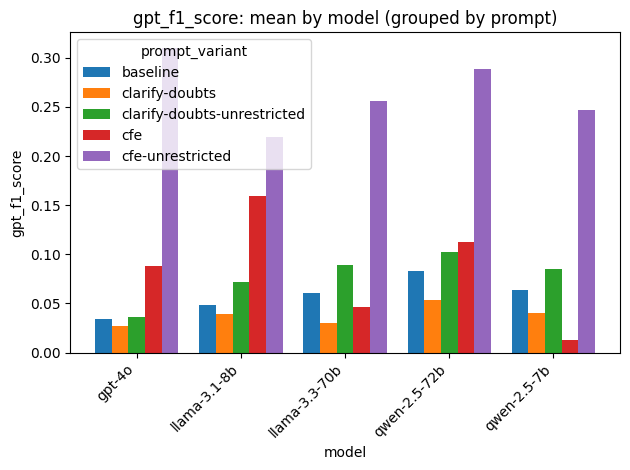

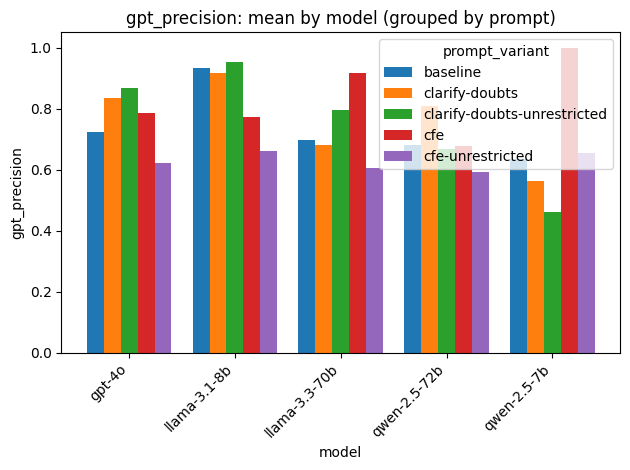

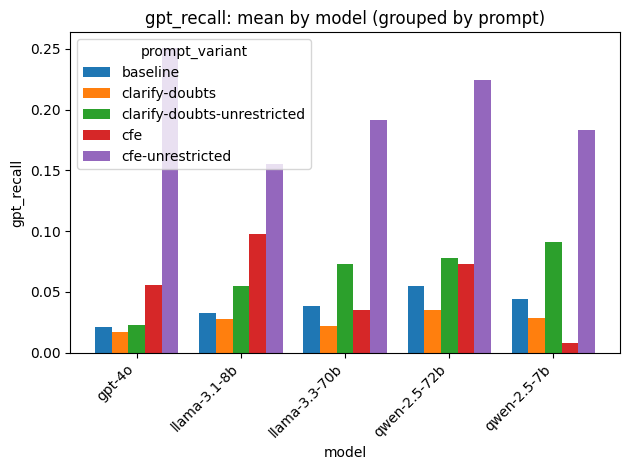

In [2]:
metric_cols = ["gpt_f1_score", "gpt_precision", "gpt_recall"]

if "model" in df.columns and "prompt_variant" in df.columns and metric_cols:
    models = sorted(df["model"].dropna().unique().tolist())
    prompts = sorted(df["prompt_variant"].dropna().unique().tolist())
    prompts = sorted(prompts, key=lambda x: ["baseline", "clarify-doubts", "clarify-doubts-unrestricted", "cfe", "cfe-unrestricted"].index(x) if x in ["baseline", "clarify-doubts", "clarify-doubts-unrestricted" ,"cfe", "cfe-unrestricted"] else len(prompts))


    for m in metric_cols:
        means = (
            df
            .groupby(["model", "prompt_variant"])[m]
            .mean()
            .unstack("prompt_variant")
            .reindex(index=models, columns=prompts)
        )

        x = np.arange(len(models), dtype=float)
        n_bars = len(prompts)
        if n_bars == 0:
            continue

        # width so that groups don't overlap
        width = 0.8 / n_bars
        offsets = (np.arange(n_bars) - (n_bars - 1) / 2.0) * width

        plt.figure()
        for j, pr in enumerate(prompts):
            y = pd.to_numeric(means[pr], errors="coerce").fillna(0).values
            plt.bar(x + offsets[j], y, width=width, label=str(pr))
        plt.title(f"{m}: mean by model (grouped by prompt)")
        plt.xlabel("model")
        plt.ylabel(m)
        plt.xticks(ticks=x, labels=models, rotation=45, ha="right")
        plt.legend(title="prompt_variant")
        plt.tight_layout()
        plt.show()